# General Benchmark Visualization

Written by Lanyue Zhang and Alan Kaptanoglu

In *16_benchmark_paper.ipynb*, we demonstrate our benchmark for system identificatino methods. Our benchmark generates a big set of data, covering the Pareto-optimal model performances for 70 selected chaotic systems with respect to 3 levels of noise, 4 dynamic properties, and 4 optimization algorithms. In addition, our benchmark evaluates the model performance via two matrices: RMSE and Normalized Error. For convinience, we store the benchmark results in `./data/` folder in a bunch of text files.

In this notebook, we illustrate how to visualize the complete benchmark results of all systems from the recorded text files.

# Load Model Performances

All benchmark results are stored under the directory `./data/` in form of text files. In this section, we read all these data files and load the informatino to a dataframe.

For each system, we record the model performances for 3 levels of noise (0, 0.2%, 2%), 4 dynamic properties (chaos, scale separation, syntactic complexity, amount of nonlinearity), and 4 optimization algorithms (STLSQ (weak), SR3, Lasso, MISOR). 

In [1]:
import os
import pandas as pd

# extract data files
path = 'data/'
files = [pos_json for pos_json in os.listdir(path)]

files_strong = []
for file in files:
    if 'weakform' not in file and 'AIC' in file:
        files_strong.append(file)

files = files_strong
# sort so that data of the same type are together
files.sort()

# preview files
files

['avg_coef_error_Lasso_AIC',
 'avg_coef_error_Lasso_AIC_noise01',
 'avg_coef_error_Lasso_AIC_noise1',
 'avg_coef_error_MIOSR_AIC',
 'avg_coef_error_MIOSR_AIC_noise01',
 'avg_coef_error_MIOSR_AIC_noise1',
 'avg_coef_error_SR3_AIC',
 'avg_coef_error_SR3_AIC_noise01',
 'avg_coef_error_SR3_AIC_noise1',
 'avg_coef_error_SR3_nu1e-1_AIC',
 'avg_coef_error_SR3_nu1e-1_AIC_noise01',
 'avg_coef_error_SR3_nu1e-1_AIC_noise1',
 'avg_coef_error_STLSQ_AIC',
 'avg_coef_error_STLSQ_AIC_noise01',
 'avg_coef_error_STLSQ_AIC_noise1',
 'avg_rmse_error_Lasso_AIC',
 'avg_rmse_error_Lasso_AIC_noise01',
 'avg_rmse_error_Lasso_AIC_noise1',
 'avg_rmse_error_MIOSR_AIC',
 'avg_rmse_error_MIOSR_AIC_noise01',
 'avg_rmse_error_MIOSR_AIC_noise1',
 'avg_rmse_error_SR3_AIC',
 'avg_rmse_error_SR3_AIC_noise01',
 'avg_rmse_error_SR3_AIC_noise1',
 'avg_rmse_error_SR3_nu1e-1_AIC',
 'avg_rmse_error_SR3_nu1e-1_AIC_noise01',
 'avg_rmse_error_SR3_nu1e-1_AIC_noise1',
 'avg_rmse_error_STLSQ_AIC',
 'avg_rmse_error_STLSQ_AIC_noise01'

In [2]:
data = pd.DataFrame()

# we need both the json and an index number so use enumerate()
for index, file in enumerate(files):
    with open(os.path.join(path, file)) as f:
        temp = f.read().splitlines()
        # convert string to float
        temp = list(map(float, temp))
        # append to dataframe as a column
        data.insert(index, files[index], temp)
    
# preview the dataframe
data

,avg_coef_error_Lasso_AIC,avg_coef_error_Lasso_AIC_noise01,avg_coef_error_Lasso_AIC_noise1,avg_coef_error_MIOSR_AIC,avg_coef_error_MIOSR_AIC_noise01,avg_coef_error_MIOSR_AIC_noise1,avg_coef_error_SR3_AIC,avg_coef_error_SR3_AIC_noise01,avg_coef_error_SR3_AIC_noise1,avg_coef_error_SR3_nu1e-1_AIC,...,std_rmse_error_MIOSR_AIC_noise1,std_rmse_error_SR3_AIC,std_rmse_error_SR3_AIC_noise01,std_rmse_error_SR3_AIC_noise1,std_rmse_error_SR3_nu1e-1_AIC,std_rmse_error_SR3_nu1e-1_AIC_noise01,std_rmse_error_SR3_nu1e-1_AIC_noise1,std_rmse_error_STLSQ_AIC,std_rmse_error_STLSQ_AIC_noise01,std_rmse_error_STLSQ_AIC_noise1
0,0.060063,0.055692,0.111861,0.002106,0.002843,0.042968,0.003671,0.062666,0.597170,0.003887,...,0.007231,0.000010,0.000315,0.003020,0.000013,0.000349,0.001772,0.000018,0.000279,0.004336
1,0.213353,0.770420,0.145259,0.107179,1.408008,0.022234,3.915297,71.208709,547.814459,18.125865,...,0.004463,0.004558,0.004275,0.035211,0.001216,0.024901,0.042349,0.000189,0.000954,0.263283
2,0.009918,0.008211,0.036489,0.006276,0.007712,0.009369,0.003812,0.012464,0.145704,0.003833,...,0.001655,0.000019,0.000222,0.016549,0.000008,0.000548,0.021684,0.000009,0.000289,0.000840
3,0.388712,0.354200,0.466110,0.003739,0.002632,0.037833,0.027214,0.394630,2.380739,0.042656,...,0.004791,0.000720,0.006049,0.016650,0.002349,0.000671,0.011819,0.000045,0.000316,0.003022
4,0.768916,0.752297,0.757177,0.065639,0.590650,0.771426,0.065982,0.617564,4.373603,0.122174,...,0.002138,0.000016,0.000493,0.003674,0.000149,0.000125,0.001714,0.000040,0.000142,0.007912
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,0.007612,0.004426,0.026079,0.000926,0.001004,0.008699,0.015261,0.303863,2.809066,0.013202,...,0.002737,0.000020,0.000276,0.002018,0.000010,0.000482,0.001904,0.000012,0.000085,0.001825
66,0.169840,0.098667,0.118591,0.085595,0.096393,0.083928,0.081402,0.107944,0.254545,0.088974,...,0.031282,0.009839,0.010060,0.227047,0.004702,0.002056,0.006893,0.006290,0.006027,0.001609
67,0.310919,0.290474,0.112393,0.035951,0.411466,0.021878,0.028550,1.086557,5.577049,0.027226,...,0.003168,0.000002,0.000618,0.006604,0.000005,0.000492,0.003969,0.000004,0.000284,0.005838
68,0.044598,0.050733,0.048320,0.058600,0.067027,0.051752,0.049137,0.052824,0.013279,0.049981,...,0.000884,0.000107,0.001541,0.002465,0.000149,0.000365,0.008258,0.000346,0.000933,0.013505


# Load System Property Metrics

Dynamic properties are important factors in our benchmark in considering the potential correlation. The dynamical properties are usualy used as the x-axis in our visualization.

In [3]:
# description length
with open('description_lengths') as f:
    temp = f.read().splitlines()
    # convert string to float
    desc_lengths = list(map(float, temp))
    
# lyapunov exponents
with open('lyapunov_exponents') as f:
    temp = f.read().splitlines()
    # convert string to float
    lyap_expos = list(map(float, temp))
    
# nonlinearity metric
with open('nonlinearity_metric') as f:
    temp = f.read().splitlines()
    # convert string to float
    nonlins = list(map(float, temp))

# scale separation 
with open('scale_separation_metric') as f:
    temp = f.read().splitlines()
    # convert string to float
    scales = list(map(float, temp))

In [6]:
# sort the properties
import numpy as np

# description length
descrip_sort = np.argsort(desc_lengths)
descrip_list_sorted = np.sort(desc_lengths)

# lyapunov exponents
chaos_sort = np.argsort(lyap_expos)
chaos_list_sorted = np.sort(lyap_expos)
    
# nonlinearity metric
nonlin_sort = np.argsort(nonlins)
nonlin_list_sorted = np.sort(nonlins)

# scale separation 
scale_sort = np.argsort(scales)
scale_list_sorted = np.sort(scales)

# General Visualization

This section presents two good looking graphs that shows the benchmark visualization in RMSE and Normalized Error.

Note that the benchmark data are ploted in log-log scale to magnify any potential correlation between model's performances and dynamic properties. The x-axis is the dynamic property, and the y-axis is the model performance. The color of the data points represents the noise level. The shape of the data points represents the optimization algorithm. However, it is hard for one to observe any clear trend from the performance curve.

In [5]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import linregress
from matplotlib.lines import Line2D

#### Name Labels

In [7]:
name_labels = ["Lasso", "MIOSR", "SR3", "SR3 (nu = 0.1)", "STLSQ"]

## Coefficient Error Plot by Noise

In [11]:
def plot_scale_separation(curr_ave, curr_std, c):
    slope, intercept, r_value, p_value, std_err = linregress(
        scale_list_sorted, data.iloc[:, curr_ave].to_numpy()[scale_sort]
    )
    
    f = c + "o"
    plt.errorbar(
        scale_list_sorted,
        data.iloc[:, curr_ave].to_numpy()[scale_sort],
        data.iloc[:, curr_std].to_numpy()[scale_sort],
        fmt=f,
        label="Sorted by scale separation",
        markersize=1
    )
    
    l = c + "--"
    plt.plot(scale_list_sorted, slope * scale_list_sorted + intercept, l, linewidth=3)

    
def plot_description_length(curr_ave, curr_std, c):
    # description length
    slope, intercept, r_value, p_value, std_err = linregress(
        descrip_list_sorted, data.iloc[:, curr_ave].to_numpy()[descrip_sort]
    )
    
    f = c + "o"
    plt.errorbar(
        descrip_list_sorted,
        data.iloc[:, curr_ave].to_numpy()[descrip_sort],
        data.iloc[:, curr_std].to_numpy()[descrip_sort],
        fmt=f,
        label="Sorted by syntactic complexity",
        markersize=2
    )
    
    l = c + "--"
    plt.plot(descrip_list_sorted, slope * descrip_list_sorted + intercept, l, linewidth=3)

       
def plot_chaotic_level(curr_ave, curr_std, c):
    slope, intercept, r_value, p_value, std_err = linregress(
        chaos_list_sorted, data.iloc[:, curr_ave].to_numpy()[chaos_sort]
    )
    
    f = c + "o"
    plt.errorbar(
        chaos_list_sorted,
        data.iloc[:, curr_ave].to_numpy()[chaos_sort],
        data.iloc[:, curr_std].to_numpy()[chaos_sort],
        fmt=f,
        label="Sorted by chaos",
        markersize=2
    )
    
    l = c + "--"
    plt.plot(chaos_list_sorted, slope * chaos_list_sorted + intercept, l, linewidth=3)
    

def plot_nonlinearity(curr_ave, curr_std, c):
    slope, intercept, r_value, p_value, std_err = linregress(
        nonlin_list_sorted, data.iloc[:, curr_ave].to_numpy()[nonlin_sort]
    )
    
    f = c + "o"
    plt.errorbar(
        scale_list_sorted,
        data.iloc[:, curr_ave].to_numpy()[nonlin_sort],
        data.iloc[:, curr_std].to_numpy()[nonlin_sort],
        fmt=f,
        label="Sorted by nonlinearity",
        markersize=2
    )
    
    l = c + "--"
    plt.plot(scale_list_sorted, slope * nonlin_list_sorted + intercept, l, linewidth=3)

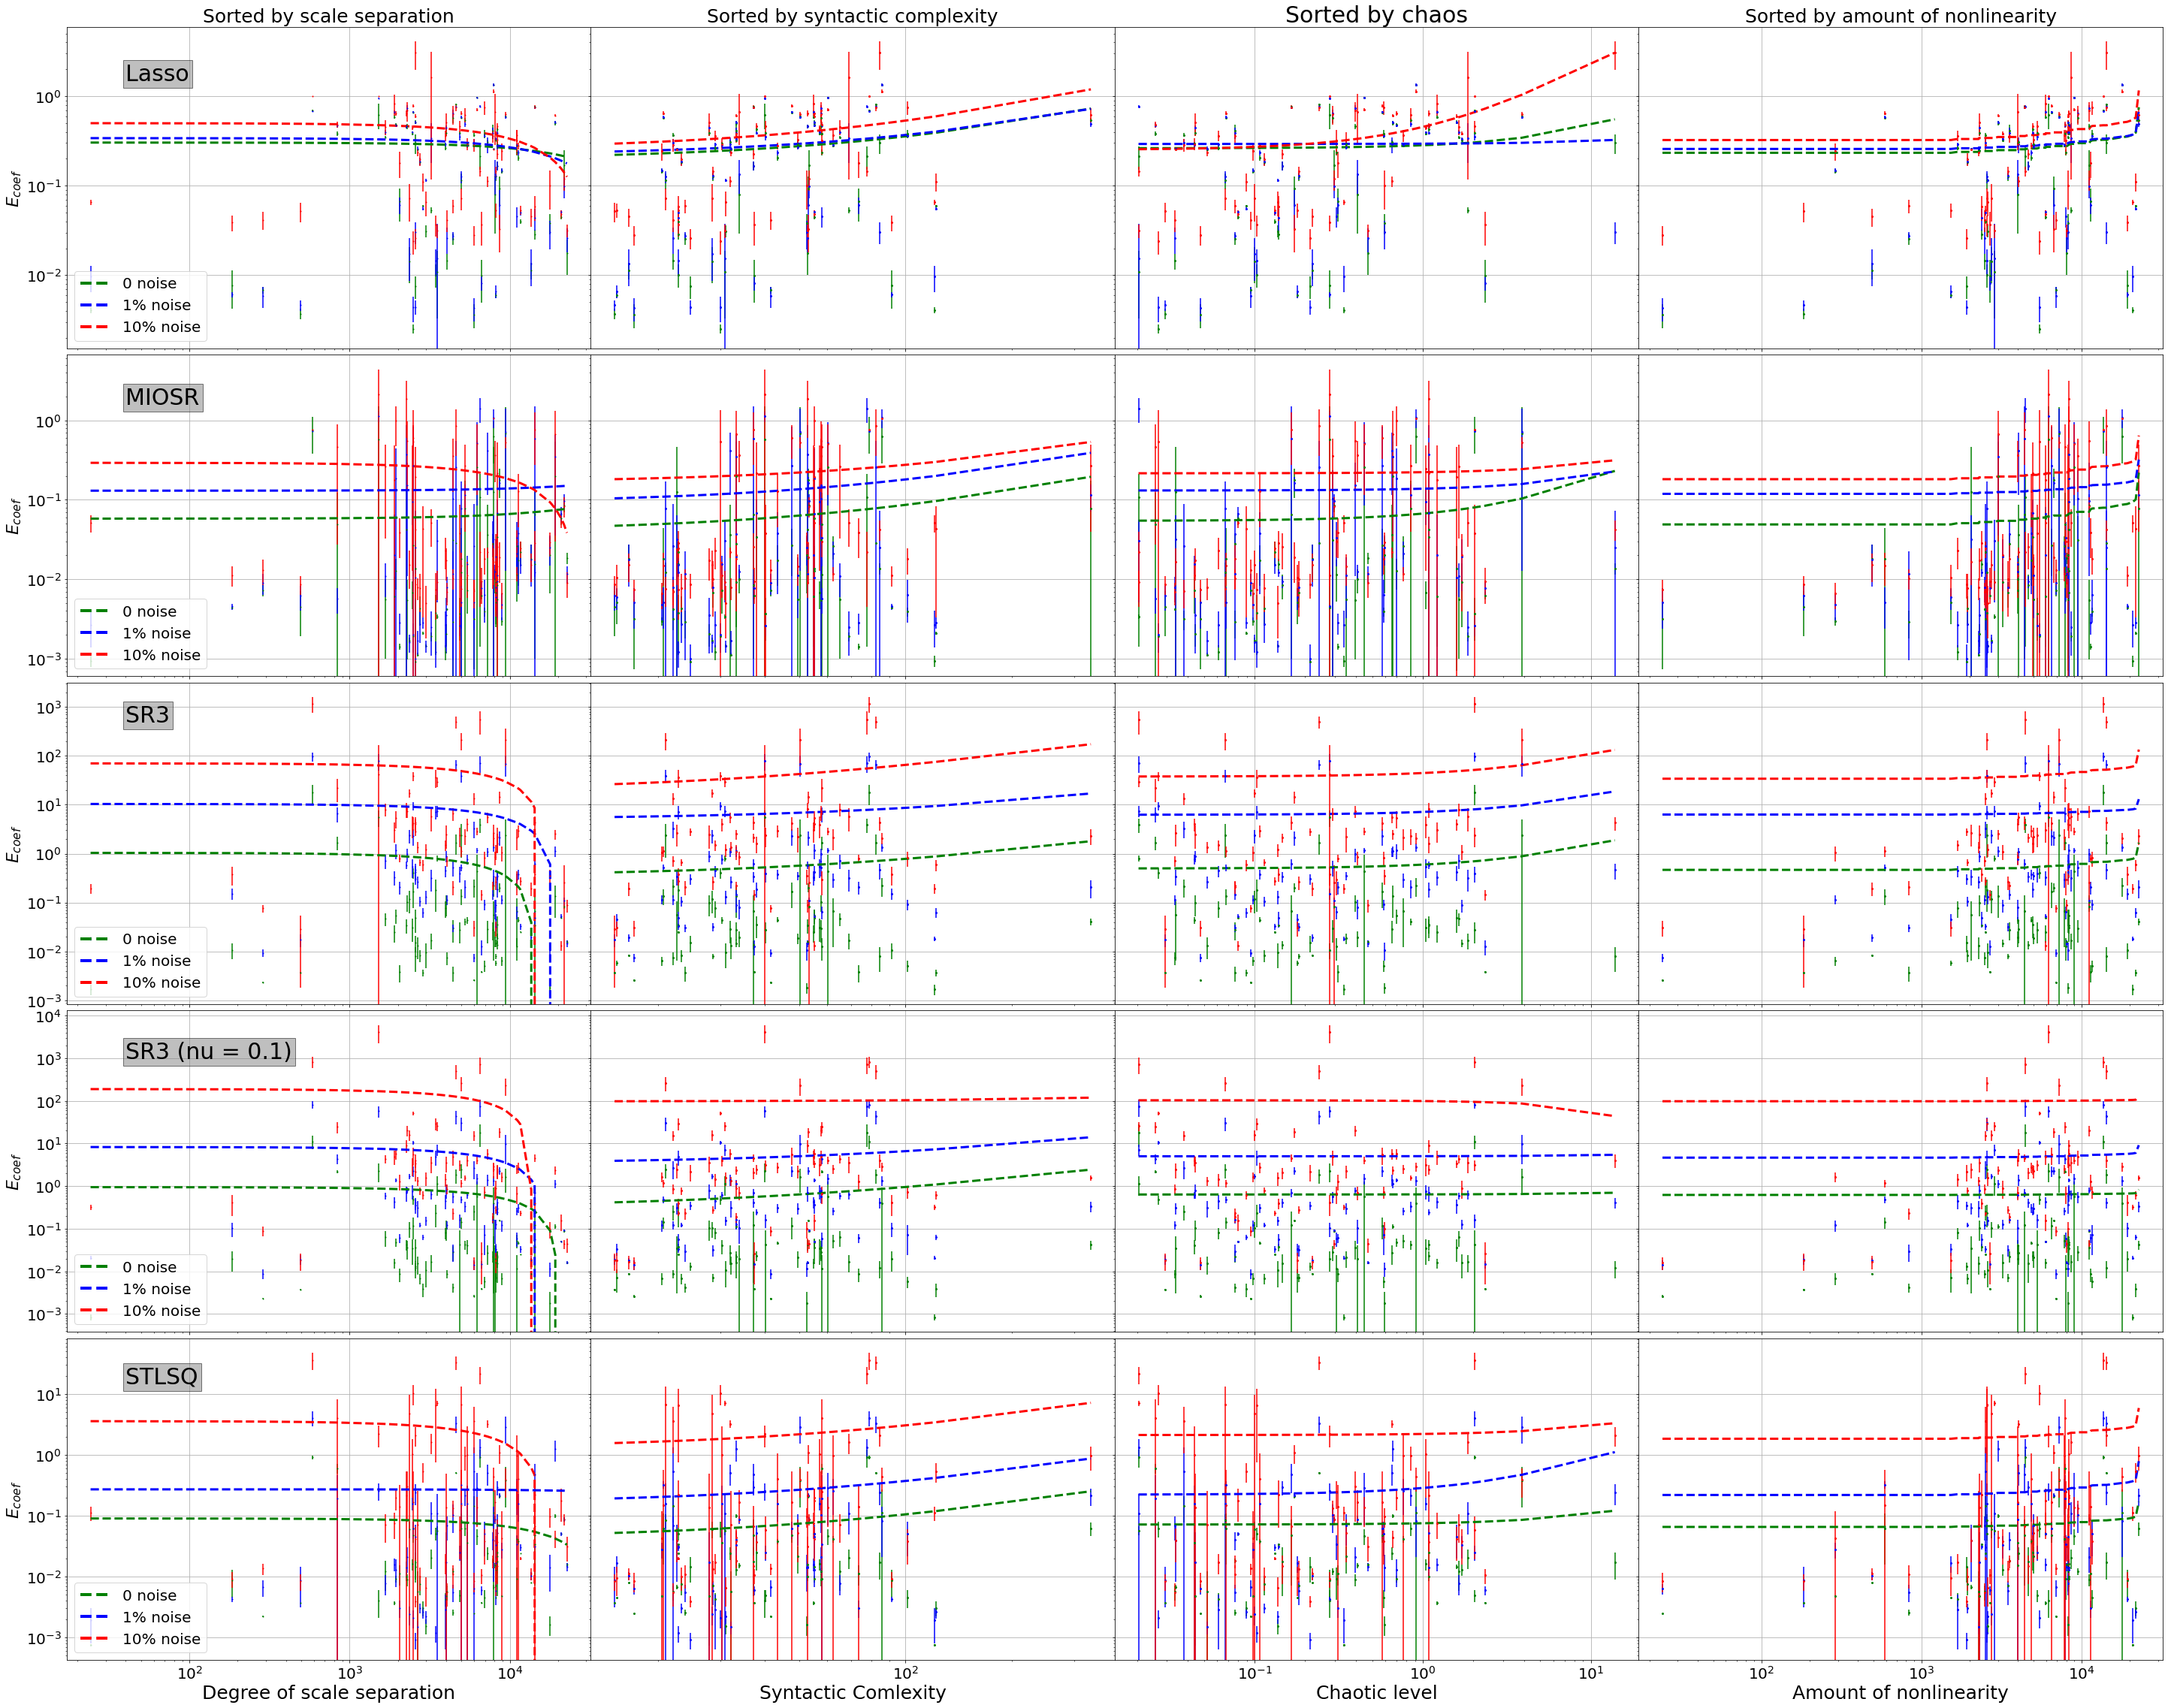

In [12]:
fig = plt.figure(figsize=(50, 40))
for i in range(5):
    x = 40
    if i == 0:
        y = 1.5
    elif i == 1:
        y = 1.6
    elif i == 2:
        y = 500
    elif i == 3:
        y = 1e3
    elif i == 4:
        y = 15
    
    
    curr_ave = 0 + 3 * i
    curr_std = curr_ave + 30
    
    # scale separation
    ax = plt.subplot(5, 4, 1 + 4 * i)
    plot_scale_separation(curr_ave, curr_std, "g")
    plot_scale_separation(curr_ave + 1, curr_std + 1, "b")
    plot_scale_separation(curr_ave + 2, curr_std + 2, "r")
    
    text = plt.text(x, y, name_labels[i], fontsize=30,
                    bbox=dict(boxstyle="square",
                           ec=(1., 0.5, 0.5),
                           fc=(1., 0.8, 0.8),
                           ))
    text.set_bbox(dict(facecolor='grey', alpha=0.5, edgecolor='black'))
    
    plt.xscale("log")
    plt.grid(True)
    plt.yscale('log')
    if i != 4:
        ax.set_xticklabels([])
    else:
        plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.subplots_adjust(hspace=0.02, wspace=0)
    plt.ylabel('$E_{coef}$', fontsize=22)
    
    if i == 0:
        ax.set_title("Sorted by scale separation", fontsize=25)
    if i == 4:
        plt.xlabel("Degree of scale separation", fontsize=25)
        
    custom_lines = [Line2D([0], [0], color='g', linestyle='--',lw=4),
                    Line2D([0], [0], color='b', linestyle='--', lw=4),
                    Line2D([0], [0], color='r', linestyle='--', lw=4)]
    
    ax.legend(custom_lines, ['0 noise', '1% noise', '10% noise'], loc="lower left", fontsize=20)
    
    # description length
    ax = plt.subplot(5, 4, 2 + 4 * i)
    plot_description_length(curr_ave, curr_std, "g")
    plot_description_length(curr_ave + 1, curr_std + 1, "b")
    plot_description_length(curr_ave + 2, curr_std + 2, "r")
    
    plt.xscale("log")
    plt.yscale('log')
    plt.grid(True)
    if i != 4:
        ax.set_xticklabels([])
    else:
        plt.xticks(fontsize=20)
    ax.set_yticklabels([])
    
    if i == 0:
        ax.set_title("Sorted by syntactic complexity", fontsize=25)
    if i == 4:
        plt.xlabel("Syntactic Comlexity", fontsize=25)
    
    # chaotic level
    ax = plt.subplot(5, 4, 3 + 4 * i)
    plot_chaotic_level(curr_ave, curr_std, "g")
    plot_chaotic_level(curr_ave + 1, curr_std + 1, "b")
    plot_chaotic_level(curr_ave + 2, curr_std + 2, "r")
    plt.xscale("log")
    plt.yscale('log')
    plt.grid(True)
    if i != 4:
        ax.set_xticklabels([])
    else:
        plt.xticks(fontsize=20)
    ax.set_yticklabels([])
    
    if i == 0:
        ax.set_title("Sorted by chaos", fontsize=30)
    if i == 4:
        plt.xlabel("Chaotic level", fontsize=25)
    
    # nonlinearity
    ax = plt.subplot(5, 4, 4 + 4 * i)
    plot_nonlinearity(curr_ave, curr_std, "g")
    plot_nonlinearity(curr_ave + 1, curr_std + 1, "b")
    plot_nonlinearity(curr_ave + 2, curr_std + 2, "r")
    plt.xscale("log")
    plt.yscale('log')
    plt.grid(True)
    if i != 4:
        ax.set_xticklabels([])
    else:
        plt.xticks(fontsize=20)
    ax.set_yticklabels([])
    
    if i == 0:
        ax.set_title("Sorted by amount of nonlinearity", fontsize=25)
    if i == 4:
        plt.xlabel("Amount of nonlinearity", fontsize=25)

plt.savefig("Pictures/coefficient.pdf")


## RMSE Plot by Noise

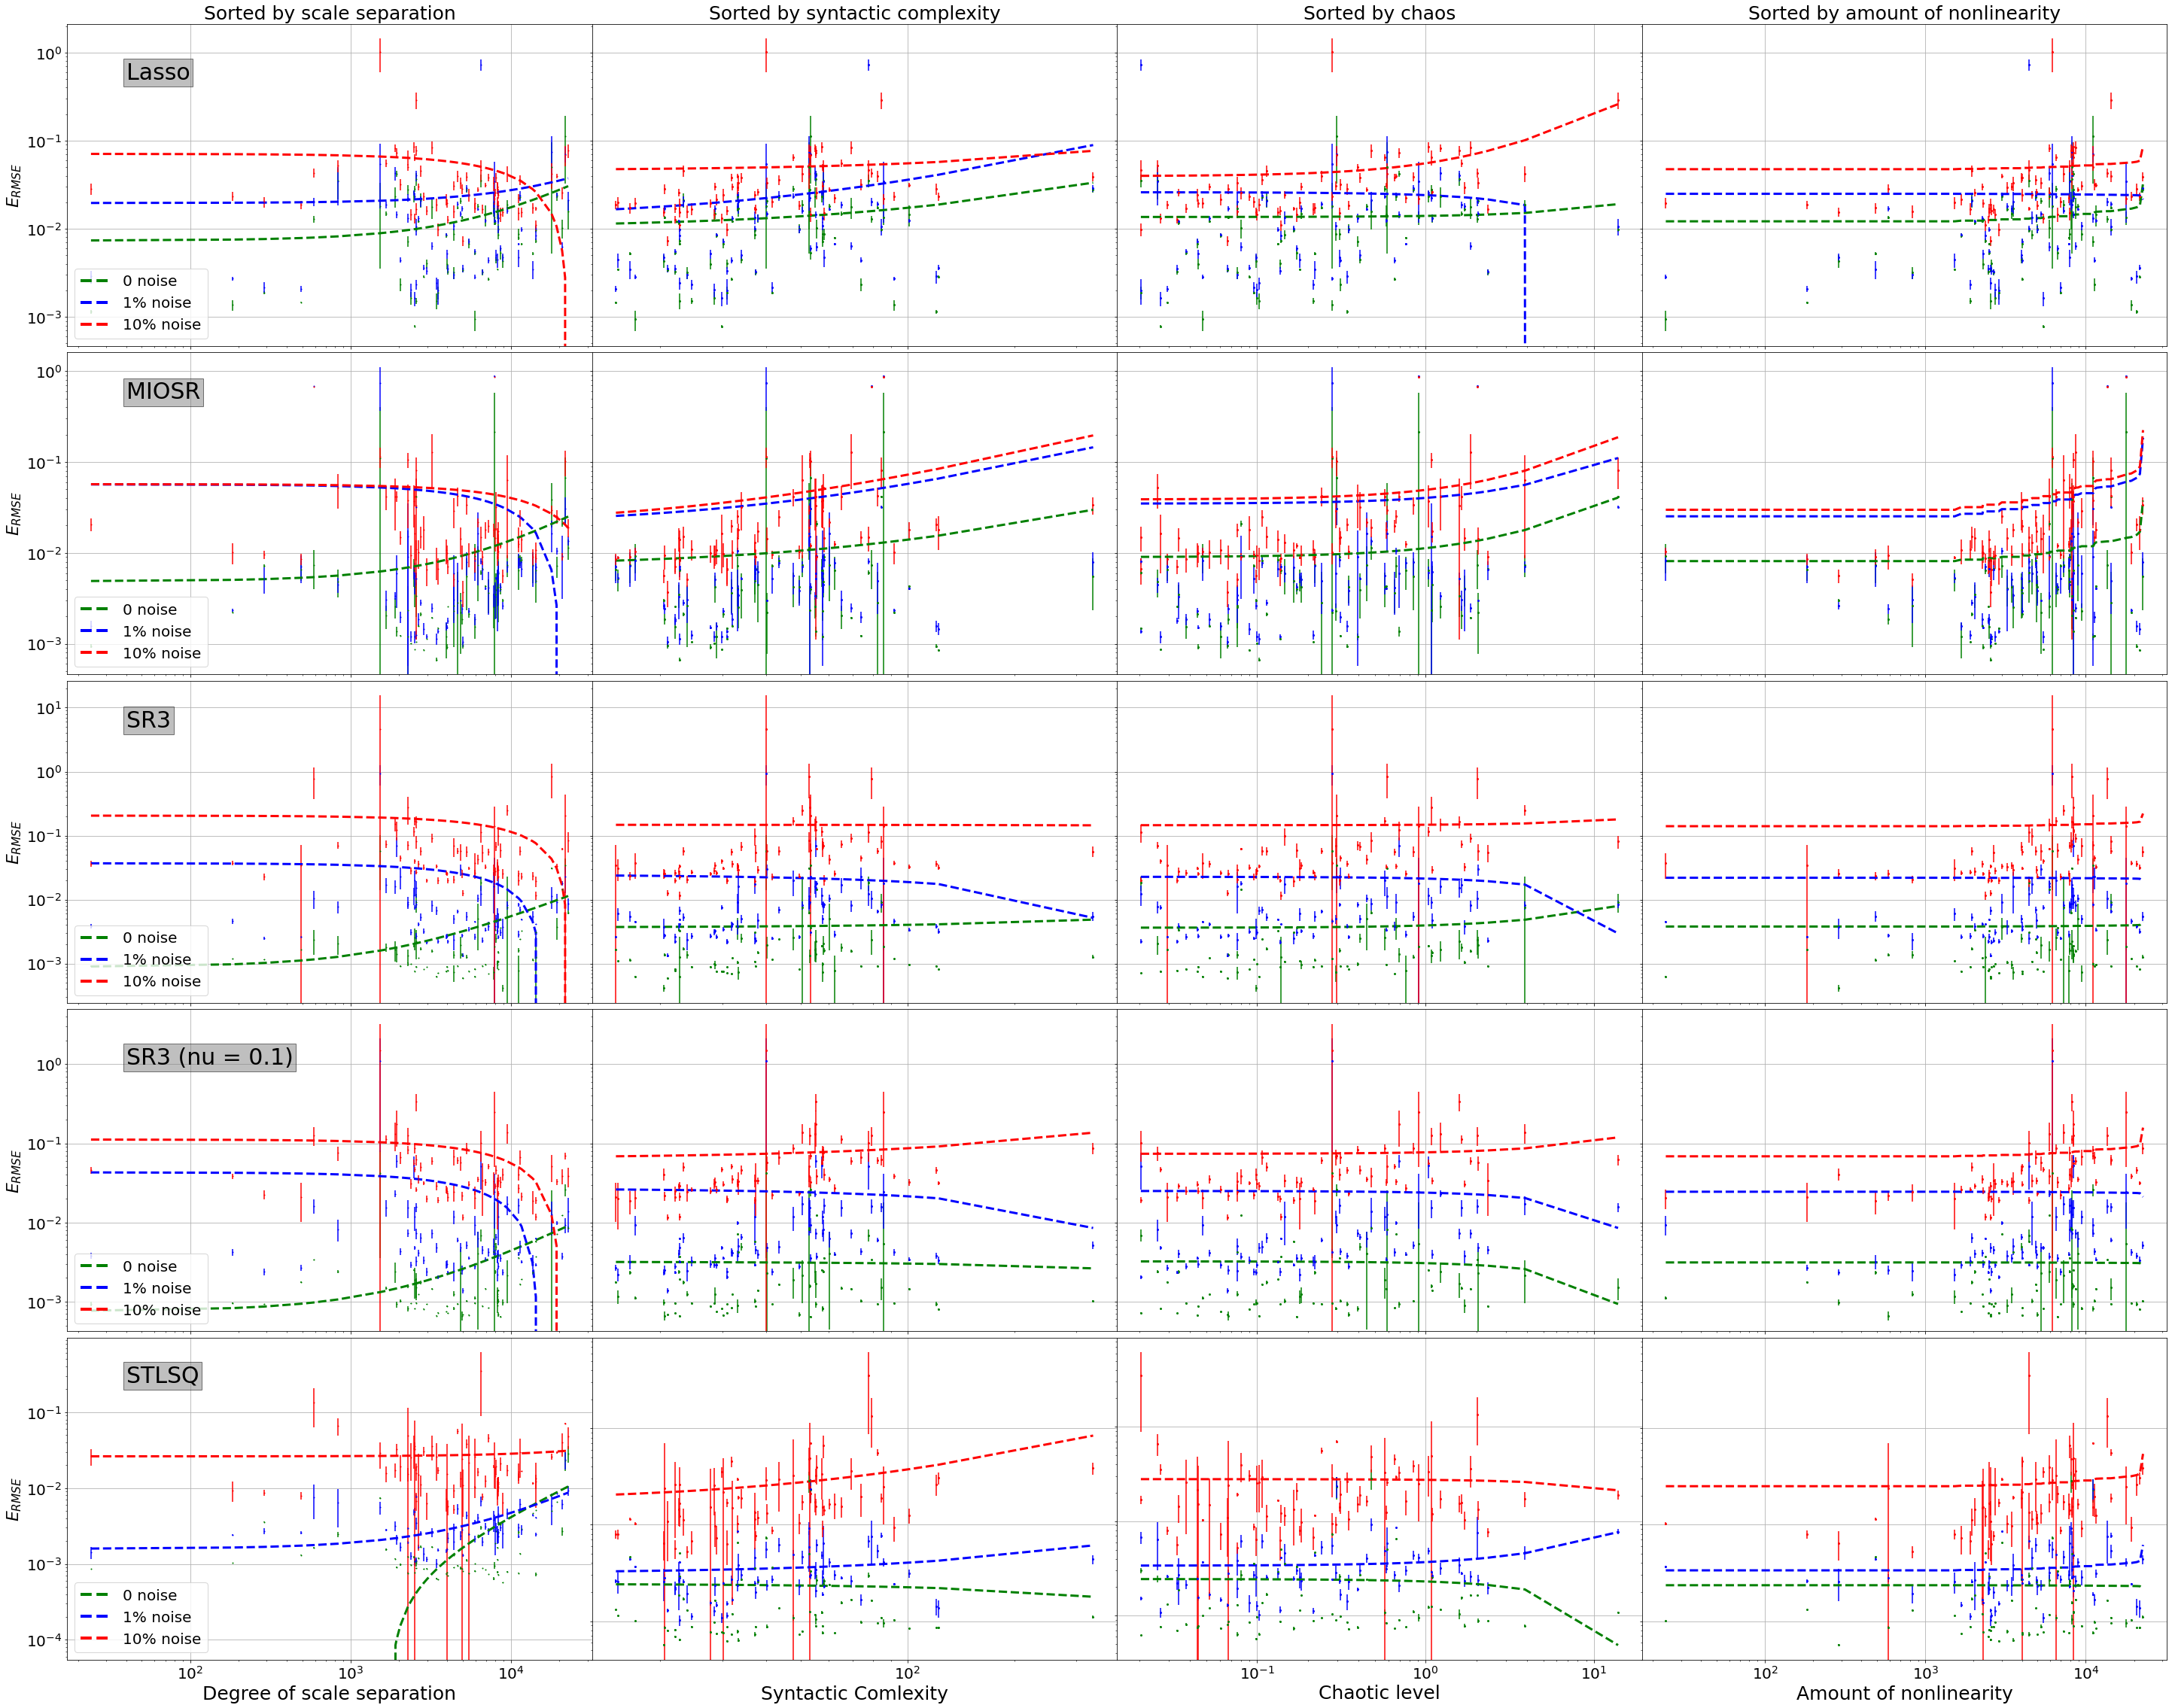

In [13]:
fig = plt.figure(figsize=(50, 40))
for i in range(5):
    x = 40
    if i == 0:
        y = 0.5
    elif i == 1:
        y = 0.5
    elif i == 2:
        y = 5
    elif i == 3:
        y = 1
    elif i == 4:
        y = 0.25
    
    
    curr_ave = 15 + 3 * i
    curr_std = curr_ave + 30
    
    # scale separation
    ax = plt.subplot(5, 4, 1 + 4 * i)
    plot_scale_separation(curr_ave, curr_std, "g")
    plot_scale_separation(curr_ave + 1, curr_std + 1, "b")
    plot_scale_separation(curr_ave + 2, curr_std + 2, "r")
    
    text = plt.text(x, y, name_labels[i], fontsize=30,
                    bbox=dict(boxstyle="square",
                           ec=(1., 0.5, 0.5),
                           fc=(1., 0.8, 0.8),
                           ))
    text.set_bbox(dict(facecolor='grey', alpha=0.5, edgecolor='black'))
    
    plt.xscale("log")
    plt.grid(True)
    plt.yscale('log')
    if i != 4:
        ax.set_xticklabels([])
    else:
        plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.subplots_adjust(hspace=0.02, wspace=0)
    plt.ylabel('$E_{RMSE}$', fontsize=22)
    
    if i == 0:
        ax.set_title("Sorted by scale separation", fontsize=25)
    if i == 4:
        plt.xlabel("Degree of scale separation", fontsize=25)
        
    custom_lines = [Line2D([0], [0], color='g', linestyle='--',lw=4),
                    Line2D([0], [0], color='b', linestyle='--', lw=4),
                    Line2D([0], [0], color='r', linestyle='--', lw=4)]
    
    ax.legend(custom_lines, ['0 noise', '1% noise', '10% noise'], loc="lower left", fontsize=20)
    
    # description length
    ax = plt.subplot(5, 4, 2 + 4 * i)
    plot_description_length(curr_ave, curr_std, "g")
    plot_description_length(curr_ave + 1, curr_std + 1, "b")
    plot_description_length(curr_ave + 2, curr_std + 2, "r")
    
    plt.xscale("log")
    plt.yscale('log')
    plt.grid(True)
    if i != 4:
        ax.set_xticklabels([])
    else:
        plt.xticks(fontsize=20)
    ax.set_yticklabels([])
    
    if i == 0:
        ax.set_title("Sorted by syntactic complexity", fontsize=25)
    if i == 4:
        plt.xlabel("Syntactic Comlexity", fontsize=25)
    
    # chaotic level
    ax = plt.subplot(5, 4, 3 + 4 * i)
    plot_chaotic_level(curr_ave, curr_std, "g")
    plot_chaotic_level(curr_ave + 1, curr_std + 1, "b")
    plot_chaotic_level(curr_ave + 2, curr_std + 2, "r")
    plt.xscale("log")
    plt.yscale('log')
    plt.grid(True)
    if i != 4:
        ax.set_xticklabels([])
    else:
        plt.xticks(fontsize=20)
    ax.set_yticklabels([])
    
    if i == 0:
        ax.set_title("Sorted by chaos", fontsize=25)
    if i == 4:
        plt.xlabel("Chaotic level", fontsize=25)
    
    # nonlinearity
    ax = plt.subplot(5, 4, 4 + 4 * i)
    plot_nonlinearity(curr_ave, curr_std, "g")
    plot_nonlinearity(curr_ave + 1, curr_std + 1, "b")
    plot_nonlinearity(curr_ave + 2, curr_std + 2, "r")
    plt.xscale("log")
    plt.yscale('log')
    plt.grid(True)
    if i != 4:
        ax.set_xticklabels([])
    else:
        plt.xticks(fontsize=20)
    ax.set_yticklabels([])
    
    if i == 0:
        ax.set_title("Sorted by amount of nonlinearity", fontsize=25)
    if i == 4:
        plt.xlabel("Amount of nonlinearity", fontsize=25)

plt.savefig("Pictures/RMSE.pdf")